<a href="https://colab.research.google.com/github/Tejesh-45/data-mining/blob/main/Lab_5_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Statistical Summary:
        Employee_ID  Department  Monthly_Salary  Years_of_Experience  \
count    100.000000         100      100.000000           100.000000   
unique          NaN           6             NaN                  NaN   
top             NaN  Operations             NaN                  NaN   
freq            NaN          24             NaN                  NaN   
mean      50.500000         NaN    74155.081700            10.240000   
std       29.011492         NaN    24765.021112             5.778959   
min        1.000000         NaN    30634.090000             1.000000   
25%       25.750000         NaN    54103.632500             6.000000   
50%       50.500000         NaN    73622.835000            10.000000   
75%       75.250000         NaN    94087.112500            16.000000   
max      100.000000         NaN   119817.320000            20.000000   

        Performance_Score  
count          100.000000  
unique                NaN  
top                   NaN  
fr

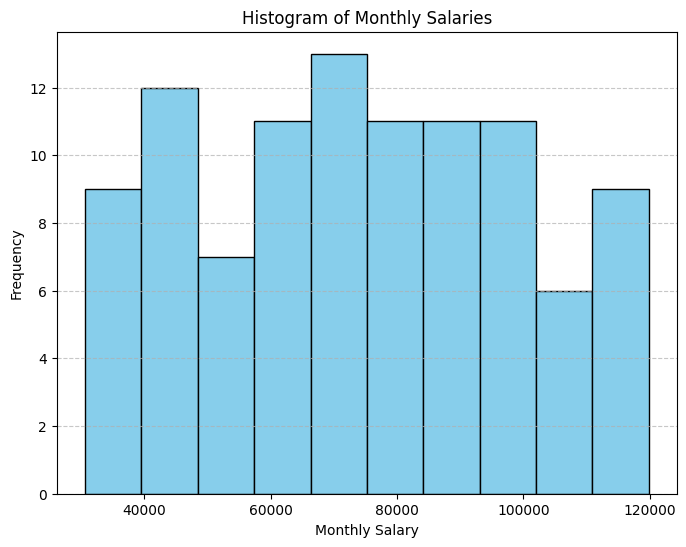

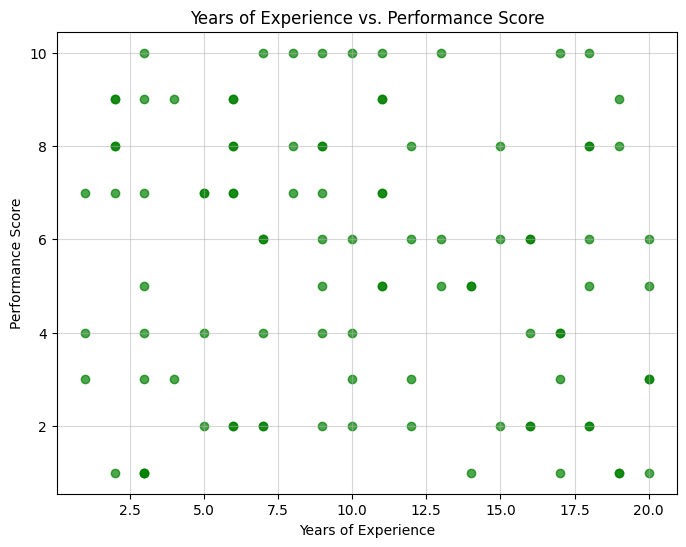

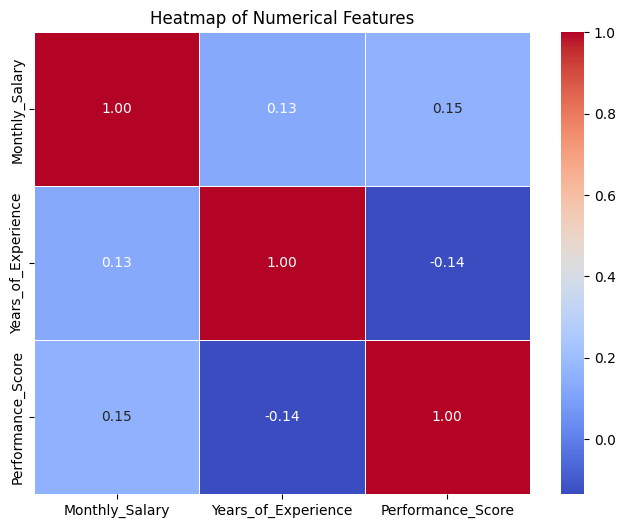

Data transformation and visualizations complete. Files saved.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = '/content/employee_performance.csv'
df = pd.read_csv(file_path)

# Statistical Summary
summary = df.describe(include='all')
print("Statistical Summary:")
print(summary)

# Data Transformation
# Encode Department as numeric categories
df['Department_Code'] = df['Department'].astype('category').cat.codes

# Create a derived column: Salary-to-Experience ratio
df['Salary_to_Experience'] = df['Monthly_Salary'] / df['Years_of_Experience']

# Grouping and Aggregation: Average Performance Score by Department
performance_by_department = df.groupby('Department')['Performance_Score'].mean().reset_index()
print("\nAverage Performance Score by Department:")
print(performance_by_department)

# Visualizations
# 1. Histogram of Monthly Salaries
plt.figure(figsize=(8, 6))
plt.hist(df['Monthly_Salary'], bins=10, color='skyblue', edgecolor='black')
plt.title('Histogram of Monthly Salaries')
plt.xlabel('Monthly Salary')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 2. Scatter Plot: Years of Experience vs. Performance Score
plt.figure(figsize=(8, 6))
plt.scatter(df['Years_of_Experience'], df['Performance_Score'], c='green', alpha=0.7)
plt.title('Years of Experience vs. Performance Score')
plt.xlabel('Years of Experience')
plt.ylabel('Performance Score')
plt.grid(alpha=0.5)
plt.show()

# 3. Heatmap of numerical features
numerical_features = ['Monthly_Salary', 'Years_of_Experience', 'Performance_Score']
plt.figure(figsize=(8, 6))
sns.heatmap(df[numerical_features].corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap of Numerical Features')
plt.show()

# Save transformations and summary to CSV files
df.to_csv('/content/employee_performance.csv', index=False)
performance_by_department.to_csv('performance_by_department.csv', index=False)
print("Data transformation and visualizations complete. Files saved.")